In [3]:
import pandas as pd
import numpy as np

Будем осуществлять работу с непростым набором данных “horse_data.csv” о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов в файле “horse_data.names” , загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [4]:
hd = pd.read_csv('horse_data.csv', names = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', 'type of lesion_1', 'type of lesion_2', 'type of lesion_3', 'cp_data'])

In [5]:
hd = hd[['Age', 'rectal temperature', 'respiratory rate', 'pulse', 'temperature of extremities', 'pain', 'outcome']]\
    .replace('?', np.nan)\
    .replace('', np.nan)
hd = hd.astype({'Age': str, 'pain': str, 'outcome': str, 'pulse': float,\
                 'respiratory rate': float, 'temperature of extremities': float, "rectal temperature": float})

In [6]:
hd.head(3)

,Age,rectal temperature,respiratory rate,pulse,temperature of extremities,pain,outcome
0,1,38.5,28.0,66.0,3.0,5,2
1,1,39.2,20.0,88.0,NaN,3,3
2,1,38.3,24.0,40.0,1.0,3,1


In [7]:
hd.groupby('Age', as_index=False).count()

,Age,rectal temperature,respiratory rate,pulse,temperature of extremities,pain,outcome
0,1,220,222,254,228,276,276
1,9,20,20,22,16,24,24


В основном все молодые в данных. Неизвестных значений по возрасту нет.

In [8]:
hd.groupby('pain', as_index=False).count()

,pain,Age,rectal temperature,respiratory rate,pulse,temperature of extremities,outcome
0,1,38,36,31,37,36,38
1,2,59,50,52,57,53,59
2,3,67,62,58,65,62,67
3,4,39,29,31,35,34,39
4,5,42,23,29,35,39,42
5,nan,55,40,41,47,20,55


Много пропущенных значений по pain, т.е. формально они заполнены, но по факту данных нет (nan)

In [9]:
hd.groupby('outcome', as_index=False).count()

,outcome,Age,rectal temperature,respiratory rate,pulse,temperature of extremities,pain
0,1,178,152,147,166,146,178
1,2,77,53,58,66,64,77
2,3,44,34,36,43,33,44
3,nan,1,1,1,1,1,1


Все базовые статистики

In [10]:
hd.describe()

,rectal temperature,respiratory rate,pulse,temperature of extremities
count,240.000000,242.000000,276.000000,244.000000
mean,38.167917,30.417355,71.913043,2.348361
std,0.732289,17.642231,28.630557,1.045054
min,35.400000,8.000000,30.000000,1.000000
25%,37.800000,18.500000,48.000000,1.000000
50%,38.200000,24.500000,64.000000,3.000000
75%,38.500000,36.000000,88.000000,3.000000
max,40.800000,96.000000,184.000000,4.000000


In [11]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         300 non-null    object 
 1   rectal temperature          240 non-null    float64
 2   respiratory rate            242 non-null    float64
 3   pulse                       276 non-null    float64
 4   temperature of extremities  244 non-null    float64
 5   pain                        300 non-null    object 
 6   outcome                     300 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.5+ KB


Пропуски у нас по rectal temperature, pulse, respiratory rate, temperature of extremities

<Axes: >

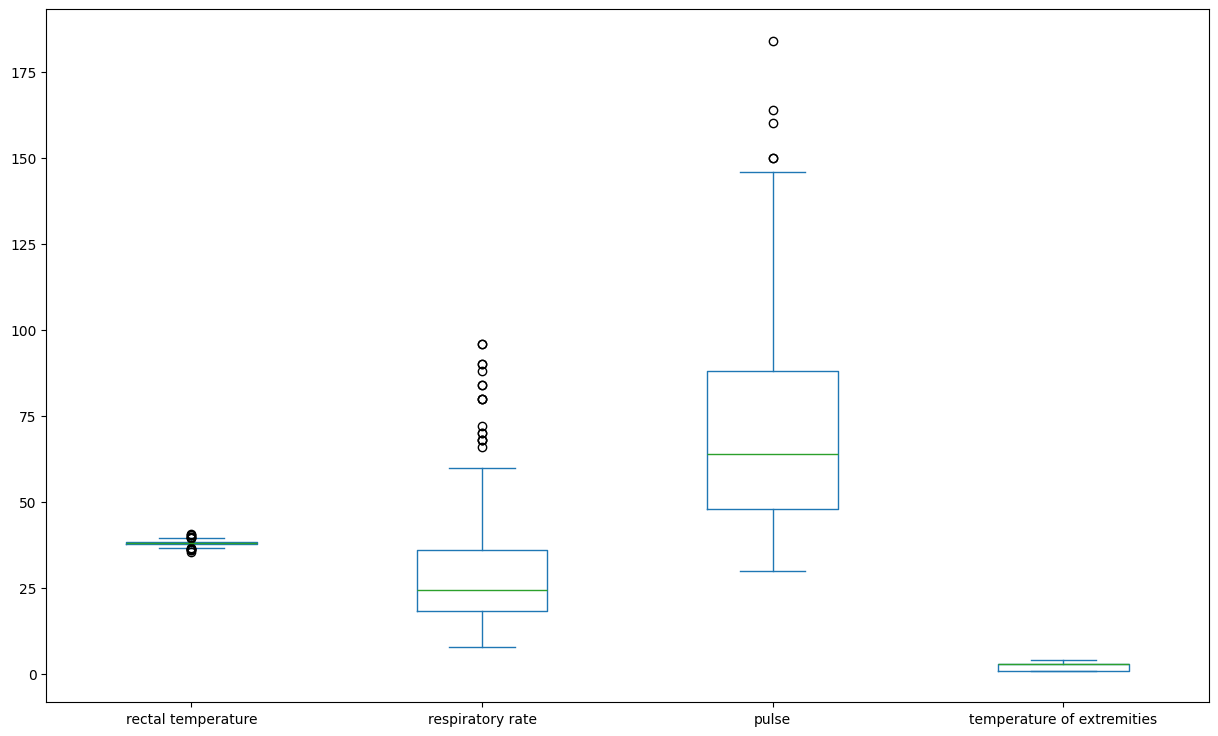

In [12]:
hd.plot.box(figsize=(15, 9))

pulse и respiratory rate имеют левостороннее распределение и выбросы данных в сторону экстремально больших значений.

Экстремально большие значения лучше вообще убрать из анализа в данном случае.

А вот значения температур, на первый взгляд, казалось бы не только не имеют выбросов, но и имеют очень небольшой разброс значений.

Но это может быть результатом недостаточного масштаба в сравнении со значениями pulse и respiratory rate, 
поэтому их стоит построить отдельно.

<Axes: >

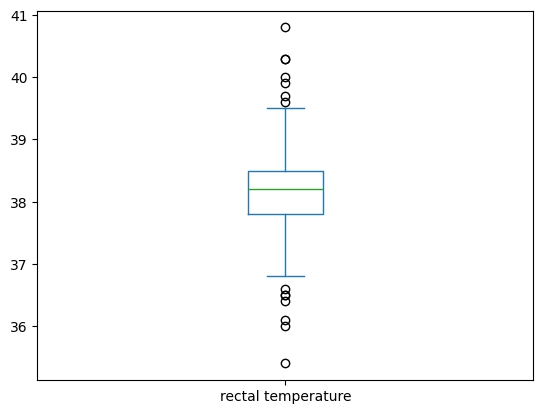

In [13]:
hd['rectal temperature'].plot.box()

Выбросы данных присутствуют. Распределение нормальное с длинными хвостами. Для анализа стоит отбросить экстремумы. Но в задании этого не требовалось... 

<Axes: >

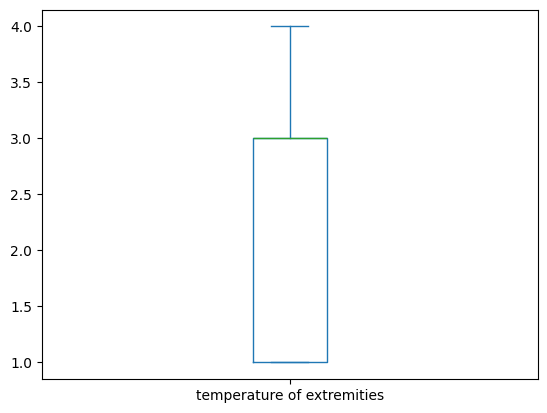

In [14]:
hd['temperature of extremities'].plot.box()

Выбросов данных в температуре конечностей нет. Ярко выраженная ассиметрия. Предположительно распределение Вейбулла. 

In [16]:
# Процент незаполненных ячеек
round(hd.isna().mean()*100, 2)

Age                            0.00
rectal temperature            20.00
respiratory rate              19.33
pulse                          8.00
temperature of extremities    18.67
pain                           0.00
outcome                        0.00
dtype: float64

In [17]:
q1 = hd['pulse'].quantile(0.25)
q3 = hd['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f'{q1}, {q3}, {iqr}, {upper_bound}, {lower_bound}')

48.0, 88.0, 40.0, 148.0, -12.0


Пульс имеет левосторонее распределение и большой правый хвост. 
Соответственно, 25 квантиль находится близко к минимальным значениям.
И при вычитании из него 1.5 iqr, получаем отрицательное значение пульса....

In [18]:
hd.head(3)

,Age,rectal temperature,respiratory rate,pulse,temperature of extremities,pain,outcome
0,1,38.5,28.0,66.0,3.0,5,2
1,1,39.2,20.0,88.0,NaN,3,3
2,1,38.3,24.0,40.0,1.0,3,1


In [19]:
print(hd['pulse'].median())
print(hd['pulse'].mean())
print(hd.groupby('Age')['pulse'].median())
print(hd.groupby('Age')['pulse'].mean())
print(hd.groupby('outcome')['pulse'].median())
print(hd.groupby('outcome')['pulse'].mean())
print(hd.groupby('pain')['pulse'].median())
print(hd.groupby('pain')['pulse'].mean())

64.0
71.91304347826087
Age
1     60.0
9    124.0
Name: pulse, dtype: float64
Age
1     67.456693
9    123.363636
Name: pulse, dtype: float64
outcome
1      54.0
2      86.0
3      82.0
nan    48.0
Name: pulse, dtype: float64
outcome
1      63.421687
2      87.227273
3      81.744186
nan    48.000000
Name: pulse, dtype: float64
pain
1      48.0
2      78.0
3      60.0
4      80.0
5      88.0
nan    60.0
Name: pulse, dtype: float64
pain
1      50.081081
2      80.859649
3      63.876923
4      82.657143
5      87.114286
nan    70.042553
Name: pulse, dtype: float64


In [20]:
print(hd['temperature of extremities'].median())
print(hd['temperature of extremities'].mean())
print(hd.groupby('Age')['temperature of extremities'].median())
print(hd.groupby('Age')['temperature of extremities'].mean())
print(hd.groupby('outcome')['temperature of extremities'].median())
print(hd.groupby('outcome')['temperature of extremities'].mean())
print(hd.groupby('pain')['temperature of extremities'].median())
print(hd.groupby('pain')['temperature of extremities'].mean())

3.0
2.348360655737705
Age
1    3.0
9    2.5
Name: temperature of extremities, dtype: float64
Age
1    2.364035
9    2.125000
Name: temperature of extremities, dtype: float64
outcome
1      2.0
2      3.0
3      3.0
nan    3.0
Name: temperature of extremities, dtype: float64
outcome
1      2.034247
2      2.750000
3      2.939394
nan    3.000000
Name: temperature of extremities, dtype: float64
pain
1      1.5
2      3.0
3      2.0
4      3.0
5      3.0
nan    3.0
Name: temperature of extremities, dtype: float64
pain
1      1.694444
2      2.490566
3      2.080645
4      2.617647
5      2.820513
nan    2.600000
Name: temperature of extremities, dtype: float64


In [21]:
print(hd['rectal temperature'].median())
print(hd['rectal temperature'].mean())
print(hd.groupby('Age')['rectal temperature'].median())
print(hd.groupby('Age')['rectal temperature'].mean())
print(hd.groupby('outcome')['rectal temperature'].median())
print(hd.groupby('outcome')['rectal temperature'].mean())
print(hd.groupby('pain')['rectal temperature'].median())
print(hd.groupby('pain')['rectal temperature'].mean())

38.2
38.16791666666667
Age
1    38.1
9    38.6
Name: rectal temperature, dtype: float64
Age
1    38.124545
9    38.645000
Name: rectal temperature, dtype: float64
outcome
1      38.20
2      38.10
3      38.05
nan    38.00
Name: rectal temperature, dtype: float64
outcome
1      38.190789
2      38.179245
3      38.052941
nan    38.000000
Name: rectal temperature, dtype: float64
pain
1      38.20
2      38.30
3      38.15
4      38.00
5      38.00
nan    38.20
Name: rectal temperature, dtype: float64
pain
1      38.094444
2      38.452000
3      38.100000
4      37.931034
5      38.165217
nan    38.157500
Name: rectal temperature, dtype: float64


In [22]:
print(hd['respiratory rate'].median())
print(hd['respiratory rate'].mean())
print(hd.groupby('Age')['respiratory rate'].median())
print(hd.groupby('Age')['respiratory rate'].mean())
print(hd.groupby('outcome')['respiratory rate'].median())
print(hd.groupby('outcome')['respiratory rate'].mean())
print(hd.groupby('pain')['respiratory rate'].median())
print(hd.groupby('pain')['respiratory rate'].mean())

24.5
30.417355371900825
Age
1    24.0
9    49.0
Name: respiratory rate, dtype: float64
Age
1    28.238739
9    54.600000
Name: respiratory rate, dtype: float64
outcome
1      24.0
2      30.0
3      24.0
nan    20.0
Name: respiratory rate, dtype: float64
outcome
1      29.278912
2      33.034483
3      31.138889
nan    20.000000
Name: respiratory rate, dtype: float64
pain
1      20.0
2      32.0
3      24.0
4      30.0
5      30.0
nan    28.0
Name: respiratory rate, dtype: float64
pain
1      21.419355
2      33.192308
3      27.775862
4      31.967742
5      31.620690
nan    35.414634
Name: respiratory rate, dtype: float64


In [23]:
print(hd.pain.unique(), hd.outcome.unique())

['5' '3' '2' 'nan' '4' '1'] ['2' '3' '1' 'nan']


При заполнении пропусков, необходимо было выбрать на какие атрибуты ориентироваться.
Несмотря на то, что pain и outcome формально не имеют пропусков. Значение nan по сути является пропуском.
Насколько рационально ориентироваться на него вопрос больше профессиональный. 
Я решила все-таки использовать эти столбцы для заполнения пропусков, так как разброс по группам 
достаточно большой.

По идее для заполнения всех пропусков в этих данных лучше брать медиану, но для разнообразнию заполним rectal temperature средним значением, так как оно близко к нормальному. В реальных данных можно было бы еще проверить характер распределение значений в группах прежде чем заполнять средним, построить графики, но мне не охото....

Сильное левое смещение в столбце pulse, поэтому лучше не брать среднее, 
т.к. выбросы мы так и не убрали,
соответсвенно заполним пропуски медианой по возрасту

In [24]:
fill_median_hd = hd.copy()
fill_median_hd['pulse'] = fill_median_hd['pulse'].fillna(hd.groupby(['Age', 'outcome', 'pain'])['pulse'].transform('median'))
fill_median_hd['respiratory rate'] = fill_median_hd['respiratory rate']\
    .fillna(fill_median_hd.groupby('Age')['respiratory rate'].transform('median'))
fill_median_hd['temperature of extremities'] = fill_median_hd['temperature of extremities']\
    .fillna(fill_median_hd.groupby(['Age', 'outcome'])['temperature of extremities'].transform('median'))
fill_median_hd['rectal temperature'] = fill_median_hd['rectal temperature']\
    .fillna(fill_median_hd.groupby(['Age', 'outcome'])['rectal temperature'].transform('mean'))

In [25]:
fill_median_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         300 non-null    object 
 1   rectal temperature          300 non-null    float64
 2   respiratory rate            300 non-null    float64
 3   pulse                       300 non-null    float64
 4   temperature of extremities  300 non-null    float64
 5   pain                        300 non-null    object 
 6   outcome                     300 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.5+ KB


In [26]:
# строка для проверки строк с null значениями

fill_median_hd[fill_median_hd.isna().any(axis=1)]

,Age,rectal temperature,respiratory rate,pulse,temperature of extremities,pain,outcome


Чтобы хотелось сказать, в итоге не получилось заполнить все пропуски ориентируясь на группировку по всем атрибутам.
Почему? Потому что не для каждой комбинации атрибутов существовала медиана/среднее. pain имел достаточно большое количество nan.
Соответственно для заполнения всех столбцов кроме pulse его пришлось игнорировать.
Вообщем в теории мы можем собираться сделать одним способ, а на практике выйдет совсем не так как мы планировали....